# Sentiment Analysis of Tweets on GST: A Lexicon Based Approach

## Problem

#### The objective is to find the emotions and opinions of popular and ordinary users about GST. This could be used to evaluate the effect of the introduction of GST on the economy.

In [1]:
# importing libraries

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from datetime import datetime
import regex as re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
#instantiation of sentiment analyser

sentiment=SentimentIntensityAnalyzer()

### 2017 Data

In [25]:
#loading dataset

tweet1=pd.read_csv('TW-hashtag-GST-2017.csv',lineterminator='\n')
tweet1.head()

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
0,Sat Dec 30 21:25:02 +0000 2017,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94721698508...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
1,Sat Dec 30 22:30:01 +0000 2017,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94723334098...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
2,Sat Dec 30 20:30:01 +0000 2017,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94720314218...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
3,Sat Dec 30 20:02:38 +0000 2017,1169914286,vinmaxinfotech,#GST Going To Change India's Economy: Venkaiah...,https://twitter.com/vinmaxinfotech,FiMobile,https://twitter.com/vinmaxinfotech/status/9471...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
4,Sat Dec 30 23:30:01 +0000 2017,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94724844035...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...


In [26]:
tweet1.shape

(100000, 9)

In [27]:
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweetDate   100000 non-null  object
 1   twitterId   100000 non-null  int64 
 2   handle      100000 non-null  object
 3   text        100000 non-null  object
 4   profileUrl  100000 non-null  object
 5   name        99671 non-null   object
 6   tweetLink   100000 non-null  object
 7   timestamp   100000 non-null  object
 8   query       100000 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


In [28]:
#duplicate rows

tweet1[tweet1.duplicated()]

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
410,Sat Dec 30 06:12:24 +0000 2017,1153045459,INCIndia,#GST लागू किए जाने से फिल्म निर्माण की अर्थव्य...,https://twitter.com/INCIndia,Congress,https://twitter.com/INCIndia/status/9469873155...,2021-01-07T09:28:22.970Z,https://twitter.com/search?q=%23GST%20until%3A...
1192,Thu Dec 28 08:47:16 +0000 2017,3287325307,cbic_india,#GST Rates on Real Estates @FinMinIndia @askGS...,https://twitter.com/cbic_india,CBIC,https://twitter.com/cbic_india/status/94630151...,2021-01-07T09:28:22.972Z,https://twitter.com/search?q=%23GST%20until%3A...
1298,Thu Dec 28 08:47:16 +0000 2017,3287325307,cbic_india,#GST Rates on Real Estates @FinMinIndia @askGS...,https://twitter.com/cbic_india,CBIC,https://twitter.com/cbic_india/status/94630151...,2021-01-07T09:28:22.972Z,https://twitter.com/search?q=%23GST%20until%3A...
1374,Thu Dec 28 08:48:19 +0000 2017,3287325307,cbic_india,Clarification about applicability of #GST on U...,https://twitter.com/cbic_india,CBIC,https://twitter.com/cbic_india/status/94630177...,2021-01-07T09:28:22.972Z,https://twitter.com/search?q=%23GST%20until%3A...
1694,Thu Dec 28 04:37:02 +0000 2017,916278290,tallysolutions,GSTR-1 filing is so easy with Tally.ERP 9 on y...,https://twitter.com/tallysolutions,Tally Solutions,https://twitter.com/tallysolutions/status/9462...,2021-01-07T09:28:22.973Z,https://twitter.com/search?q=%23GST%20until%3A...
...,...,...,...,...,...,...,...,...,...
98747,Wed Sep 13 16:14:46 +0000 2017,95588504,amitmalviya,Global crude prices and increased VAT by State...,https://twitter.com/amitmalviya,Amit Malviya,https://twitter.com/amitmalviya/status/9080010...,2021-01-07T09:28:24.027Z,https://twitter.com/search?q=%23GST%20until%3A...
99030,Thu Sep 14 03:11:37 +0000 2017,21080743,RatanSharda55,"#GST panel gives relief to Luxury cars, but No...",https://twitter.com/RatanSharda55,Ratan Sharda 🇮🇳,https://twitter.com/RatanSharda55/status/90816...,2021-01-07T09:28:24.028Z,https://twitter.com/search?q=%23GST%20until%3A...
99212,Wed Sep 13 08:29:45 +0000 2017,1254436688,bprerna,Monthly household costs up after GST? You are ...,https://twitter.com/bprerna,Dr. Prerna Bakshi,https://twitter.com/bprerna/status/90788398932...,2021-01-07T09:28:24.028Z,https://twitter.com/search?q=%23GST%20until%3A...
99480,Wed Sep 13 12:38:19 +0000 2017,140798905,ZeeBusiness,@dpradhanbjp @PetroleumMin 'We want #Petroleum...,https://twitter.com/ZeeBusiness,Zee Business,https://twitter.com/ZeeBusiness/status/9079465...,2021-01-07T09:28:24.028Z,https://twitter.com/search?q=%23GST%20until%3A...


In [29]:
#Dropping duplicate rows

tweet1.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [30]:
#Converting 'tweetDate' to Datetime type

tweet1['tweetDate']=pd.to_datetime(tweet1['tweetDate']).dt.date
tweet1.head()

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
0,2017-12-30,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94721698508...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
1,2017-12-30,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94723334098...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
2,2017-12-30,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94720314218...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
3,2017-12-30,1169914286,vinmaxinfotech,#GST Going To Change India's Economy: Venkaiah...,https://twitter.com/vinmaxinfotech,FiMobile,https://twitter.com/vinmaxinfotech/status/9471...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...
4,2017-12-30,883726907518234625,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/94724844035...,2021-01-07T09:28:22.969Z,https://twitter.com/search?q=%23GST%20until%3A...


In [31]:
#Removing unwanted columns

tweet1.drop(['twitterId','handle','profileUrl','tweetLink','timestamp','query','name'],axis=1,inplace=True)

In [32]:
tweet1

,tweetDate,text
0,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
1,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
2,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
3,2017-12-30,#GST Going To Change India's Economy: Venkaiah...
4,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
...,...,...
99280,2017-09-11,Hurry TaxPayers ! Last date for filing GSTR -1...
99281,2017-09-12,#IndiaDevelopmentDebate | #StateOfEconomy\nWhe...
99282,2017-09-12,"#GST Due dates for filing GSTR-1, 2 &amp; 3 ex..."
99283,2017-09-12,#RPS ના અમારા @brijesh_patel74 ભાઈએ #GST મુદ્દ...


In [33]:
tweet1.isnull().sum()

tweetDate    0
text         0
dtype: int64

In [34]:
#tweet1.to_csv('tweet')

### 2018 Data

In [35]:
tweet2=pd.read_csv('TW-hashtag-GST-2018.csv',lineterminator='\n')
tweet2.head()

C:\Users\Sandra Puthuvamana\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,query,error,timestamp,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink
0,https://twitter.com/search?q=%23GST%20until%3A...,Timeout exceeded while waiting for event,2021-01-07T09:32:08.320Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/search?q=%23GST%20until%3A...,Timeout exceeded while waiting for event,2021-01-07T09:35:14.803Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/search?q=%23GST%20until%3A...,Timeout exceeded while waiting for event,2021-01-07T11:30:51.681Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.289Z,Sun Dec 30 21:25:01 +0000 2018,8.837269e+17,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/10794885522...
4,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.289Z,Sun Dec 30 18:25:01 +0000 2018,8.837269e+17,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/10794432559...


In [36]:
tweet2.shape

(100003, 10)

In [37]:
tweet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query       100003 non-null  object 
 1   error       3 non-null       object 
 2   timestamp   100003 non-null  object 
 3   tweetDate   100000 non-null  object 
 4   twitterId   100000 non-null  float64
 5   handle      100000 non-null  object 
 6   text        100000 non-null  object 
 7   profileUrl  100000 non-null  object 
 8   name        99997 non-null   object 
 9   tweetLink   100000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.6+ MB


In [38]:
#duplicate rows

tweet2[tweet2.duplicated()]

,query,error,timestamp,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink
923,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.298Z,Thu Dec 27 16:01:00 +0000 2018,2.078093e+08,BJP4India,Riveting tale of how a family held the country...,https://twitter.com/BJP4India,BJP,https://twitter.com/BJP4India/status/107831984...
1465,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.302Z,Wed Dec 26 03:32:40 +0000 2018,3.097504e+09,PChidambaram_IN,Until yesterday a single standard rate of GST ...,https://twitter.com/PChidambaram_IN,P. Chidambaram,https://twitter.com/PChidambaram_IN/status/107...
1658,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.302Z,Tue Dec 25 04:44:30 +0000 2018,5.233915e+07,PritishNandy,I find it offensive that the State is deciding...,https://twitter.com/PritishNandy,Pritish Nandy,https://twitter.com/PritishNandy/status/107742...
1873,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.303Z,Sat Dec 22 12:32:59 +0000 2018,3.559891e+08,ANI,Anupam Kher on GST rates being slashed on movi...,https://twitter.com/ANI,ANI,https://twitter.com/ANI/status/107645555712339...
1875,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.303Z,Tue Dec 25 04:44:30 +0000 2018,5.233915e+07,PritishNandy,I find it offensive that the State is deciding...,https://twitter.com/PritishNandy,Pritish Nandy,https://twitter.com/PritishNandy/status/107742...
...,...,...,...,...,...,...,...,...,...,...
98628,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.508Z,Sat Feb 24 11:00:02 +0000 2018,4.385549e+07,bsindia,GST e-way bill should be mandatory from April ...,https://twitter.com/bsindia,Business Standard,https://twitter.com/bsindia/status/96735342081...
99523,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.509Z,Thu Jan 07 15:32:21 +0000 2021,2.278392e+07,Skyharbour_SYH,News Release 📰 - Drill Results from the Fall 2...,https://twitter.com/Skyharbour_SYH,Skyharbour Resources,https://twitter.com/Skyharbour_SYH/status/1347...
99731,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.510Z,Thu Jan 07 15:32:21 +0000 2021,2.278392e+07,Skyharbour_SYH,News Release 📰 - Drill Results from the Fall 2...,https://twitter.com/Skyharbour_SYH,Skyharbour Resources,https://twitter.com/Skyharbour_SYH/status/1347...
99852,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.510Z,Thu Jan 07 15:32:21 +0000 2021,2.278392e+07,Skyharbour_SYH,News Release 📰 - Drill Results from the Fall 2...,https://twitter.com/Skyharbour_SYH,Skyharbour Resources,https://twitter.com/Skyharbour_SYH/status/1347...


In [39]:
#Dropping duplicate rows

tweet2.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [40]:
#Converting 'tweetDate' to Datetime type

tweet2['tweetDate']=pd.to_datetime(tweet2['tweetDate']).dt.date
tweet2.head()

,query,error,timestamp,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink
0,https://twitter.com/search?q=%23GST%20until%3A...,Timeout exceeded while waiting for event,2021-01-07T09:32:08.320Z,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/search?q=%23GST%20until%3A...,Timeout exceeded while waiting for event,2021-01-07T09:35:14.803Z,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/search?q=%23GST%20until%3A...,Timeout exceeded while waiting for event,2021-01-07T11:30:51.681Z,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.289Z,2018-12-30,8.837269e+17,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/10794885522...
4,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.289Z,2018-12-30,8.837269e+17,GST_App,#GST Info App: https://t.co/7MkIaMHzzy HS code...,https://twitter.com/GST_App,GST App,https://twitter.com/GST_App/status/10794432559...


In [41]:
#Removing unwanted columns

tweet2.drop(['twitterId','handle','profileUrl','tweetLink','timestamp','query','error','name'],axis=1,inplace=True)

In [42]:
tweet2

,tweetDate,text
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,2018-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
4,2018-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
...,...,...
99578,2018-02-19,#GST Info App: https://t.co/7MkIaMHzzy HS code...
99579,2018-02-19,Dont talk abt #fraud coz #modi tld b4 only na ...
99580,2018-02-20,#GST issues for #Bhutan to be resolved with ur...
99581,2018-02-19,#GST Info App: https://t.co/7MkIaMHzzy HS code...


In [43]:
tweet2.isnull().sum()

tweetDate    3
text         3
dtype: int64

In [44]:
tweet2=tweet2.dropna(subset=['text'])

In [45]:
tweet2

,tweetDate,text
3,2018-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
4,2018-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
5,2018-12-30,@Yadavdimplesp @yadavakhilesh Maph hoga bhi to...
6,2018-12-30,#TripleTalaqbill\n9 day Flop 😱? #TheKapilSharm...
7,2018-12-30,#TripleTalaqbill\n10 day Flop 😱? #TheKapilShar...
...,...,...
99578,2018-02-19,#GST Info App: https://t.co/7MkIaMHzzy HS code...
99579,2018-02-19,Dont talk abt #fraud coz #modi tld b4 only na ...
99580,2018-02-20,#GST issues for #Bhutan to be resolved with ur...
99581,2018-02-19,#GST Info App: https://t.co/7MkIaMHzzy HS code...


### 2019 Data

In [55]:
tweet3=pd.read_csv('TW-hashtag-GST-2019.csv',lineterminator='\n')
tweet3.head()

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
0,Mon Dec 30 17:45:50 +0000 2019,2308828902,sudhirgparmar,When @FinMinIndia &amp; @PMOIndia jointly deci...,https://twitter.com/sudhirgparmar,Sudhir Parmar,https://twitter.com/sudhirgparmar/status/12117...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
1,Mon Dec 30 19:44:44 +0000 2019,109930762,LambaAlka,#Notbandi #GST #VAT #Sealing देश की अर्थव्यवस्...,https://twitter.com/LambaAlka,Alka Lamba - अल्का लाम्बा 🇮🇳🙏,https://twitter.com/LambaAlka/status/121173488...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
2,Mon Dec 30 15:23:29 +0000 2019,338209836,INCMohitJain,भाजपा के नेता @VijayGoelBJP अपने कार्यक्रम में...,https://twitter.com/INCMohitJain,Mohit Jain मोहित जैन 🇮🇳,https://twitter.com/INCMohitJain/status/121166...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
3,Mon Dec 30 20:51:39 +0000 2019,2939753720,jbbhadra,@nsitharaman @nsitharamanoffc @cbic_india Mada...,https://twitter.com/jbbhadra,Jagdish Bhadra,https://twitter.com/jbbhadra/status/1211751728...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
4,Mon Dec 30 22:05:47 +0000 2019,44423886,jenellewalsh,January 3rd will be the best day EVER. #gst,https://twitter.com/jenellewalsh,Jenelle Frances,https://twitter.com/jenellewalsh/status/121177...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...


In [56]:
tweet3.shape

(86241, 9)

In [57]:
tweet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86241 entries, 0 to 86240
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetDate   86241 non-null  object
 1   twitterId   86241 non-null  int64 
 2   handle      86241 non-null  object
 3   text        86241 non-null  object
 4   profileUrl  86241 non-null  object
 5   name        86239 non-null  object
 6   tweetLink   86241 non-null  object
 7   timestamp   86241 non-null  object
 8   query       86241 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.9+ MB


In [38]:
#duplicate rows

tweet3[tweet3.duplicated()]

,query,error,timestamp,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink
923,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.298Z,Thu Dec 27 16:01:00 +0000 2018,2.078093e+08,BJP4India,Riveting tale of how a family held the country...,https://twitter.com/BJP4India,BJP,https://twitter.com/BJP4India/status/107831984...
1465,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.302Z,Wed Dec 26 03:32:40 +0000 2018,3.097504e+09,PChidambaram_IN,Until yesterday a single standard rate of GST ...,https://twitter.com/PChidambaram_IN,P. Chidambaram,https://twitter.com/PChidambaram_IN/status/107...
1658,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.302Z,Tue Dec 25 04:44:30 +0000 2018,5.233915e+07,PritishNandy,I find it offensive that the State is deciding...,https://twitter.com/PritishNandy,Pritish Nandy,https://twitter.com/PritishNandy/status/107742...
1873,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.303Z,Sat Dec 22 12:32:59 +0000 2018,3.559891e+08,ANI,Anupam Kher on GST rates being slashed on movi...,https://twitter.com/ANI,ANI,https://twitter.com/ANI/status/107645555712339...
1875,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.303Z,Tue Dec 25 04:44:30 +0000 2018,5.233915e+07,PritishNandy,I find it offensive that the State is deciding...,https://twitter.com/PritishNandy,Pritish Nandy,https://twitter.com/PritishNandy/status/107742...
...,...,...,...,...,...,...,...,...,...,...
98628,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.508Z,Sat Feb 24 11:00:02 +0000 2018,4.385549e+07,bsindia,GST e-way bill should be mandatory from April ...,https://twitter.com/bsindia,Business Standard,https://twitter.com/bsindia/status/96735342081...
99523,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.509Z,Thu Jan 07 15:32:21 +0000 2021,2.278392e+07,Skyharbour_SYH,News Release 📰 - Drill Results from the Fall 2...,https://twitter.com/Skyharbour_SYH,Skyharbour Resources,https://twitter.com/Skyharbour_SYH/status/1347...
99731,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.510Z,Thu Jan 07 15:32:21 +0000 2021,2.278392e+07,Skyharbour_SYH,News Release 📰 - Drill Results from the Fall 2...,https://twitter.com/Skyharbour_SYH,Skyharbour Resources,https://twitter.com/Skyharbour_SYH/status/1347...
99852,https://twitter.com/search?q=%23GST%20until%3A...,NaN,2021-01-07T15:41:35.510Z,Thu Jan 07 15:32:21 +0000 2021,2.278392e+07,Skyharbour_SYH,News Release 📰 - Drill Results from the Fall 2...,https://twitter.com/Skyharbour_SYH,Skyharbour Resources,https://twitter.com/Skyharbour_SYH/status/1347...


In [58]:
#Dropping duplicate rows

tweet3.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [59]:
tweet3.shape

(86027, 9)

In [60]:
#Converting 'tweetDate' to Datetime type

tweet3['tweetDate']=pd.to_datetime(tweet3['tweetDate']).dt.date
tweet3.head()

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
0,2019-12-30,2308828902,sudhirgparmar,When @FinMinIndia &amp; @PMOIndia jointly deci...,https://twitter.com/sudhirgparmar,Sudhir Parmar,https://twitter.com/sudhirgparmar/status/12117...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
1,2019-12-30,109930762,LambaAlka,#Notbandi #GST #VAT #Sealing देश की अर्थव्यवस्...,https://twitter.com/LambaAlka,Alka Lamba - अल्का लाम्बा 🇮🇳🙏,https://twitter.com/LambaAlka/status/121173488...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
2,2019-12-30,338209836,INCMohitJain,भाजपा के नेता @VijayGoelBJP अपने कार्यक्रम में...,https://twitter.com/INCMohitJain,Mohit Jain मोहित जैन 🇮🇳,https://twitter.com/INCMohitJain/status/121166...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
3,2019-12-30,2939753720,jbbhadra,@nsitharaman @nsitharamanoffc @cbic_india Mada...,https://twitter.com/jbbhadra,Jagdish Bhadra,https://twitter.com/jbbhadra/status/1211751728...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...
4,2019-12-30,44423886,jenellewalsh,January 3rd will be the best day EVER. #gst,https://twitter.com/jenellewalsh,Jenelle Frances,https://twitter.com/jenellewalsh/status/121177...,2021-01-07T17:12:38.849Z,https://twitter.com/search?q=%23GST%20until%3A...


In [62]:
#Removing unwanted columns

tweet3.drop(['twitterId','handle','profileUrl','tweetLink','timestamp','query','name'],axis=1,inplace=True)
tweet3

,tweetDate,text
0,2019-12-30,When @FinMinIndia &amp; @PMOIndia jointly deci...
1,2019-12-30,#Notbandi #GST #VAT #Sealing देश की अर्थव्यवस्...
2,2019-12-30,भाजपा के नेता @VijayGoelBJP अपने कार्यक्रम में...
3,2019-12-30,@nsitharaman @nsitharamanoffc @cbic_india Mada...
4,2019-12-30,January 3rd will be the best day EVER. #gst
...,...,...
86022,2019-01-01,#GST | ₹75-lakh threshold could help over 60 l...
86023,2019-01-01,"New #GST rates from today; #TV, monitor and 22..."
86024,2019-01-01,@Payal_Rohatgi @INCIndia Height of hypocrisy. ...
86025,2019-01-01,Solar industry demand uniform #GST rate of 5%


In [63]:
tweet3.isnull().sum()

tweetDate    0
text         0
dtype: int64

### 2020 Data

In [64]:
tweet4=pd.read_csv('TW-hashtag-GST-2020.csv',lineterminator='\n')
tweet4

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
0,Wed Dec 30 17:47:24 +0000 2020,714731566828793857,BloombergQuint,Government extends #GST annual return deadline...,https://twitter.com/BloombergQuint,BloombergQuint,https://twitter.com/BloombergQuint/status/1344...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
1,Wed Dec 30 17:43:17 +0000 2020,1301463571944022018,BhaiyajiCom,"इनकम टैक्स रिटर्न फ़ाइल करने की तारीख़ बढ़ी, च...",https://twitter.com/BhaiyajiCom,bhaiyajinews.com,https://twitter.com/BhaiyajiCom/status/1344338...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
2,Wed Dec 30 20:20:23 +0000 2020,1221676993080508416,fkggovt,@Infosys_GSTN in the name of #GST you guys als...,https://twitter.com/fkggovt,fkggovt,https://twitter.com/fkggovt/status/13443778180...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
3,Wed Dec 30 18:54:32 +0000 2020,889154989398134784,ankit_sisodiya1,#खाद पर 5% और #कीटनाशक पर 18% #GST लगाने वाला ...,https://twitter.com/ankit_sisodiya1,Ankit singh sisodiya,https://twitter.com/ankit_sisodiya1/status/134...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
4,Wed Dec 30 20:21:24 +0000 2020,162708945,nirajshh,Today's cruel extensions has put the Tax Profe...,https://twitter.com/nirajshh,Niraj Shah,https://twitter.com/nirajshh/status/1344378074...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
...,...,...,...,...,...,...,...,...,...
99995,Thu Dec 26 08:37:02 +0000 2019,18167018,karandikar,GST council in its 18th Dec meeting has assure...,https://twitter.com/karandikar,Prashant Karandikar,https://twitter.com/karandikar/status/12101173...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...
99996,Thu Dec 26 12:00:06 +0000 2019,28268680,SahilKapoor,The key drag on #GST revenue is two fold\n1. C...,https://twitter.com/SahilKapoor,Sahil Kapoor,https://twitter.com/SahilKapoor/status/1210168...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...
99997,Thu Dec 26 09:55:50 +0000 2019,702872335326445568,tax_scan,https://t.co/ff8KqXucJN\n#Form29B #Kerala #Hig...,https://twitter.com/tax_scan,Tax Scan,https://twitter.com/tax_scan/status/1210137132...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...
99998,Thu Dec 26 12:58:15 +0000 2019,801679158254268416,gstenabler,Key Updates on E-Invoicing. Visit: https://t.c...,https://twitter.com/gstenabler,enComply,https://twitter.com/gstenabler/status/12101830...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...


In [65]:
#duplicate rows

tweet4[tweet4.duplicated()]

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
102,Wed Dec 30 12:33:25 +0000 2020,3287325307,cbic_india,Due date of furnishing of annual return under ...,https://twitter.com/cbic_india,CBIC,https://twitter.com/cbic_india/status/13442602...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
531,Tue Dec 29 10:56:15 +0000 2020,122658025,RajatSharmaLive,Give Modi a chance: Allow farm laws to be impl...,https://twitter.com/RajatSharmaLive,Rajat Sharma,https://twitter.com/RajatSharmaLive/status/134...,2021-01-06T11:36:44.347Z,https://twitter.com/search?q=%23GST%20until%3A...
1098,Fri Feb 14 20:22:11 +0000 2020,15358364,MuleSoft,Hear what 800+ IT leaders across the globe hav...,https://twitter.com/MuleSoft,MuleSoft,https://twitter.com/MuleSoft/status/1228414151...,2021-01-06T11:36:44.356Z,https://twitter.com/search?q=%23GST%20until%3A...
1296,Fri Feb 14 20:22:11 +0000 2020,15358364,MuleSoft,Hear what 800+ IT leaders across the globe hav...,https://twitter.com/MuleSoft,MuleSoft,https://twitter.com/MuleSoft/status/1228414151...,2021-01-06T11:36:44.357Z,https://twitter.com/search?q=%23GST%20until%3A...
1425,Sun Dec 27 07:18:20 +0000 2020,957639096867803136,rajatgurnanica,हमारे मन की बात ।\n\n#Extend_Due_Dates_Immedia...,https://twitter.com/rajatgurnanica,CA. Rajat Gurnani,https://twitter.com/rajatgurnanica/status/1343...,2021-01-06T11:36:44.357Z,https://twitter.com/search?q=%23GST%20until%3A...
...,...,...,...,...,...,...,...,...,...
99203,Fri Feb 14 20:22:11 +0000 2020,15358364,MuleSoft,Hear what 800+ IT leaders across the globe hav...,https://twitter.com/MuleSoft,MuleSoft,https://twitter.com/MuleSoft/status/1228414151...,2021-01-06T11:36:44.765Z,https://twitter.com/search?q=%23GST%20until%3A...
99428,Fri Feb 14 20:22:11 +0000 2020,15358364,MuleSoft,Hear what 800+ IT leaders across the globe hav...,https://twitter.com/MuleSoft,MuleSoft,https://twitter.com/MuleSoft/status/1228414151...,2021-01-06T11:36:44.766Z,https://twitter.com/search?q=%23GST%20until%3A...
99512,Sat Dec 28 05:16:22 +0000 2019,2539528092,BimalGST,Apart from 10% Capping as per Rule 36(4)...ano...,https://twitter.com/BimalGST,CA Bimal Jain,https://twitter.com/BimalGST/status/1210791579...,2021-01-06T11:36:44.766Z,https://twitter.com/search?q=%23GST%20until%3A...
99757,Fri Feb 14 20:22:11 +0000 2020,15358364,MuleSoft,Hear what 800+ IT leaders across the globe hav...,https://twitter.com/MuleSoft,MuleSoft,https://twitter.com/MuleSoft/status/1228414151...,2021-01-06T11:36:44.768Z,https://twitter.com/search?q=%23GST%20until%3A...


In [66]:
#Dropping duplicate rows

tweet4.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [22]:
#Converting 'tweetDate' to Datetime type

tweet4['tweetDate']=pd.to_datetime(tweet4['tweetDate']).dt.date
tweet4

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query
0,2020-12-30,714731566828793857,BloombergQuint,Government extends #GST annual return deadline...,https://twitter.com/BloombergQuint,BloombergQuint,https://twitter.com/BloombergQuint/status/1344...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
1,2020-12-30,1301463571944022018,BhaiyajiCom,"इनकम टैक्स रिटर्न फ़ाइल करने की तारीख़ बढ़ी, च...",https://twitter.com/BhaiyajiCom,bhaiyajinews.com,https://twitter.com/BhaiyajiCom/status/1344338...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
2,2020-12-30,1221676993080508416,fkggovt,@Infosys_GSTN in the name of #GST you guys als...,https://twitter.com/fkggovt,fkggovt,https://twitter.com/fkggovt/status/13443778180...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
3,2020-12-30,889154989398134784,ankit_sisodiya1,#खाद पर 5% और #कीटनाशक पर 18% #GST लगाने वाला ...,https://twitter.com/ankit_sisodiya1,Ankit singh sisodiya,https://twitter.com/ankit_sisodiya1/status/134...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
4,2020-12-30,162708945,nirajshh,Today's cruel extensions has put the Tax Profe...,https://twitter.com/nirajshh,Niraj Shah,https://twitter.com/nirajshh/status/1344378074...,2021-01-06T11:36:44.345Z,https://twitter.com/search?q=%23GST%20until%3A...
...,...,...,...,...,...,...,...,...,...
99158,2019-12-26,18167018,karandikar,GST council in its 18th Dec meeting has assure...,https://twitter.com/karandikar,Prashant Karandikar,https://twitter.com/karandikar/status/12101173...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...
99159,2019-12-26,28268680,SahilKapoor,The key drag on #GST revenue is two fold\n1. C...,https://twitter.com/SahilKapoor,Sahil Kapoor,https://twitter.com/SahilKapoor/status/1210168...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...
99160,2019-12-26,702872335326445568,tax_scan,https://t.co/ff8KqXucJN\n#Form29B #Kerala #Hig...,https://twitter.com/tax_scan,Tax Scan,https://twitter.com/tax_scan/status/1210137132...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...
99161,2019-12-26,801679158254268416,gstenabler,Key Updates on E-Invoicing. Visit: https://t.c...,https://twitter.com/gstenabler,enComply,https://twitter.com/gstenabler/status/12101830...,2021-01-06T11:36:44.776Z,https://twitter.com/search?q=%23GST%20until%3A...


In [67]:
#Removing unwanted columns

tweet4.drop(['twitterId','handle','profileUrl','tweetLink','timestamp','query','name'],axis=1,inplace=True)
tweet4

,tweetDate,text
0,Wed Dec 30 17:47:24 +0000 2020,Government extends #GST annual return deadline...
1,Wed Dec 30 17:43:17 +0000 2020,"इनकम टैक्स रिटर्न फ़ाइल करने की तारीख़ बढ़ी, च..."
2,Wed Dec 30 20:20:23 +0000 2020,@Infosys_GSTN in the name of #GST you guys als...
3,Wed Dec 30 18:54:32 +0000 2020,#खाद पर 5% और #कीटनाशक पर 18% #GST लगाने वाला ...
4,Wed Dec 30 20:21:24 +0000 2020,Today's cruel extensions has put the Tax Profe...
...,...,...
99158,Thu Dec 26 08:37:02 +0000 2019,GST council in its 18th Dec meeting has assure...
99159,Thu Dec 26 12:00:06 +0000 2019,The key drag on #GST revenue is two fold\n1. C...
99160,Thu Dec 26 09:55:50 +0000 2019,https://t.co/ff8KqXucJN\n#Form29B #Kerala #Hig...
99161,Thu Dec 26 12:58:15 +0000 2019,Key Updates on E-Invoicing. Visit: https://t.c...


In [68]:
tweet4.isnull().sum()

tweetDate    0
text         0
dtype: int64

### Combining all data

In [69]:
frames=[tweet1,tweet2,tweet3,tweet4]

In [70]:
#concatenating all data

df=pd.concat(frames)
df

,tweetDate,text
0,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
1,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
2,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
3,2017-12-30,#GST Going To Change India's Economy: Venkaiah...
4,2017-12-30,#GST Info App: https://t.co/7MkIaMHzzy HS code...
...,...,...
99158,Thu Dec 26 08:37:02 +0000 2019,GST council in its 18th Dec meeting has assure...
99159,Thu Dec 26 12:00:06 +0000 2019,The key drag on #GST revenue is two fold\n1. C...
99160,Thu Dec 26 09:55:50 +0000 2019,https://t.co/ff8KqXucJN\n#Form29B #Kerala #Hig...
99161,Thu Dec 26 12:58:15 +0000 2019,Key Updates on E-Invoicing. Visit: https://t.c...


In [71]:
len(df['text'])

384055

In [72]:
df['text'].nunique()

350149

In [73]:
#top mentions
a=[]
for t in df['text']:
    x=re.findall('@[\w\d]+',t)
    if x:
        for i in x:
            a.append(i)

d={}
for j in a:
    if(j not in d.keys()):
        d[j]=1
    else:
        d[j]+=1  
top_mentions=pd.DataFrame({'mentions':d.keys(),'number':d.values()})
top_mentions.sort_values(by=['number'],ascending=False,ignore_index=True).head(10)

,mentions,number
0,@narendramodi,25459
1,@FinMinIndia,16138
2,@nsitharaman,15731
3,@GST_Council,15043
4,@PMOIndia,14070
5,@arunjaitley,11877
6,@cbic_india,9069
7,@BJP4India,6606
8,@askGST_GoI,6350
9,@INCIndia,5397


In [74]:
#top hashtags
b=[]
for t in df['text']:
    x=re.findall('#[\w\d]+',t)
    if x:
        for i in x:
            b.append(i)

h={}
for j in b:
    if(j not in h.keys()):
        h[j]=1
    else:
        h[j]+=1  
top_ht=pd.DataFrame({'hashtag':h.keys(),'number':h.values()}) 
top_ht.sort_values(by=['number'],ascending=False,ignore_index=True).head(10)

,hashtag,number
0,#GST,332050
1,#tax,38768
2,#gst,37400
3,#Demonetisation,7476
4,#India,7192
5,#GSTAmnesty,7167
6,#gstcouncil,7103
7,#Tax,6514
8,#GSTCouncilMeet,6083
9,#GSTCouncil,6045


In [75]:
#top links
c=[]
for t in df['text']:
    x=re.findall('https?://\S+|www\.\S+',t)
    if x:
        for i in x:
            c.append(i)

l={}
for j in c:
    if(j not in l.keys()):
        l[j]=1
    else:
        l[j]+=1  
top_link=pd.DataFrame({'link':l.keys(),'number':l.values()})
top_link.sort_values(by=['number'],ascending=False,ignore_index=True).head(10)

,link,number
0,https://t.co/7MkIaMHzzy,29276
1,https://t.co/7MkIaMpYI0,977
2,https://t.co/btG7xyrlA1,341
3,https://t.co/BIXscFIxSD,299
4,https://t.co/oZxjpf9CD4,289
5,https://t.co/wrA2q3C0oU,241
6,https://t.co/4j8fwZm5Pr,208
7,https://t.co/PAydY3pNEh,204
8,https://t.co/mYT3kwlUWs,187
9,https://t.co/4cH6TPuhzC:,173


In [76]:
new=pd.DataFrame({'text':df['text']})

In [32]:
# preprocess text

def preprocess(text):
    
    # remove new lines
    text = text.replace('\n','')
    
    # remove links
    text = re.sub('https?://\S+|www\.\S+','', text)
    
    # remove hashtags at the end of text
    #text=re.sub('#[\S]+','',text)
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',text)
    
    # remove handles
    text=re.sub('@[\S]+','',text)
    #text = re.sub('@[\w]+', '',text)
    
    #remove &amp
    text = re.sub('[&Amp|&amp]','',text)
    
   
    # remove extra spaces
    #re.sub("\s\s+", "", text)
    
    # lower case
    text = text.strip().lower() 

    #print(text)
    #removing keywords eg: info app: code
    text = re.sub('info\s*[A-Za-z]*:\s*[A-Za-z]*\s*code\s*\d*','',text)
    
   
    # remove punctuations
    punc ='''.?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in text:
        if i in punc:
            text = text.replace(i, '')
            
    
    # lemmatization
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    
    # stopword removal
    #text = [word for word in text.split(' ') if word not in stopword]
    #text=" ".join(text)
    
     
    return text

In [33]:
df['text']= df['text'].apply(preprocess)

In [34]:
#finding sentiment score

polarity = [round(sentiment.polarity_scores(i)['compound'],2 ) for i in df['text']]
df['sentiment_score'] = polarity

In [35]:
df['score']=''

In [36]:
#Based on sentiment scores, creating new column saying whether each tweet is positive, negative or neutral.

for i in range(len(df['sentiment_score'])):
    if df.iloc[i]['sentiment_score']==0:
        df['score'].iloc[i]=0
    elif df.iloc[i]['sentiment_score']>0:
        df['score'].iloc[i]=1
    else:
        df['score'].iloc[i]=-1

C:\Users\Sandra Puthuvamana\anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
new['cleaned text']=df['text']
new['score']=df['score']

In [38]:
new

,text,cleaned text,score
0,#GST Info App: https://t.co/7MkIaMHzzy HS code...,gst tx 18\r sototroin it derivtives nd struct...,1
1,#GST Info App: https://t.co/7MkIaMHzzy HS code...,gst tx 12 ornge juice frozen,1
2,#GST Info App: https://t.co/7MkIaMHzzy HS code...,gst tx 12\r clendrs of ny kind rinted includi...,1
3,#GST Going To Change India's Economy: Venkaiah...,gst going to chnge indis econoy venkih nidu ...,1
4,#GST Info App: https://t.co/7MkIaMHzzy HS code...,gst tx 5 other onuentl or building stone,1
...,...,...,...
99158,GST council in its 18th Dec meeting has assure...,gst council in it 18th dec eeting h ssured to ...,0
99159,The key drag on #GST revenue is two fold\n1. C...,the key drg on gst revenue is two fold1 coodit...,1
99160,https://t.co/ff8KqXucJN\n#Form29B #Kerala #Hig...,,0
99161,Key Updates on E-Invoicing. Visit: https://t.c...,key udtes on einvoicing visit,0


Now 'new' dataframe has 'text' with original text and 'cleaned text' with text after preprocessing.

In [39]:
sub = pd.DataFrame({
        "Date":df['tweetDate'].unique(),
    })
sub

,Date
0,2017-12-30
1,2017-12-29
2,2017-12-27
3,2017-12-28
4,2017-10-21
...,...
1290,2020-01-07
1291,2020-01-06
1292,2020-01-05
1293,2020-01-01


In [40]:
sub=sub.sort_values(by='Date',ascending=True, ignore_index=True)
sub

,Date
0,2009-09-16
1,2010-05-01
2,2011-12-22
3,2012-05-23
4,2012-05-24
...,...
1290,2020-12-27
1291,2020-12-28
1292,2020-12-29
1293,2020-12-30


In [41]:
sub['positive']=''
sub['neutral']=''
sub['negative']=''

In [42]:
t=df.sort_values(by='tweetDate',ascending=True, ignore_index=True)
t

,tweetDate,text,name,sentiment_score,score
0,2009-09-16,wtching luxuryplnes on love show like this,Interstate 583,0.77,1
1,2010-05-01,finl thing f rel f rel srtcus hd soe nice en i...,RachelDAngel Duh,0.42,1
2,2011-12-22,is dis prl relly suree r v to tret lloo muly s...,Arvind Kejriwal,0.51,1
3,2012-05-23,mssive hike in etrol rice is rie exle of the ...,Narendra Modi,-0.44,-1
4,2012-05-23,mssive hike in etrol rice is rie exle of the ...,Narendra Modi,-0.44,-1
...,...,...,...,...,...
384050,2020-12-30,dte extend kro 🤬 extendduedtesieditely,Amitnagi,0.18,1
384051,2021-01-07,bective bssdors l jhid 🤼 ⛷️ nd 🎾 insire u wi...,EUSport,0.25,1
384052,2021-01-07,news relese 📰 drill result fro the fll 2020 d...,Skyharbour Resources,0.00,0
384053,2021-01-07,news relese 📰 drill result fro the fll 2020 d...,Skyharbour Resources,0.00,0


In [43]:
#Finding number of positive, negative and neutral tweets in each day

s=0
for j in range(len(sub['Date'])):
    p,n,nu=0,0,0
    for i in range(s,len(t['tweetDate'])):
        if(t['tweetDate'].iloc[i]==sub['Date'].iloc[j]):
            if t['score'].iloc[i]==0:
                nu+=1
            elif t['score'].iloc[i]==1:
                p+=1
            else:
                n+=1
        else:
            s=i
            break
    sub['positive'][j]=p
    sub['neutral'][j]=nu
    sub['negative'][j]=n

In [44]:
sub

,Date,positive,neutral,negative
0,2009-09-16,1,0,0
1,2010-05-01,1,0,0
2,2011-12-22,1,0,0
3,2012-05-23,1,0,2
4,2012-05-24,0,0,1
...,...,...,...,...
1290,2020-12-27,96,227,24
1291,2020-12-28,143,191,21
1292,2020-12-29,96,278,35
1293,2020-12-30,137,188,34


In [45]:
sub_p=sub[['Date','positive']]
sp=sub_p.sort_values(by=['positive'],ascending=False).head(10)
sp

,Date,positive
185,2017-11-10,1160
150,2017-10-06,967
380,2018-07-01,856
186,2017-11-11,801
151,2017-10-07,790
400,2018-07-21,588
168,2017-10-24,581
191,2017-11-16,562
190,2017-11-15,529
187,2017-11-12,513


In [46]:
sub_n=sub[['Date','negative']]
sn=sub_n.sort_values(by=['negative'],ascending=False).head(10)
sn

,Date,negative
185,2017-11-10,451
186,2017-11-11,304
150,2017-10-06,275
167,2017-10-23,270
192,2017-11-17,259
151,2017-10-07,247
168,2017-10-24,233
164,2017-10-20,217
165,2017-10-21,211
191,2017-11-16,206


In [47]:
sub_combine=pd.concat([sp,sn],axis=1)
sub_combine.sort_values(by=['positive','negative'],ascending=False,ignore_index=True)

,Date,positive,Date,negative
0,2017-11-10,1160,2017-11-10,451
1,2017-10-06,967,2017-10-06,275
2,2018-07-01,856,NaN,NaN
3,2017-11-11,801,2017-11-11,304
4,2017-10-07,790,2017-10-07,247
5,2018-07-21,588,NaN,NaN
6,2017-10-24,581,2017-10-24,233
7,2017-11-16,562,2017-11-16,206
8,2017-11-15,529,NaN,NaN
9,2017-11-12,513,NaN,NaN


In [48]:
sub_combine.to_csv('sub_combine.csv')

In [49]:
neu_s=sub['neutral'].sum()
neu_s

211820

In [50]:
p_s=sub['positive'].sum()
p_s

130359

In [51]:
n_s=sub['negative'].sum()
n_s

41876

In [52]:
# net sentiment

net = (p_s-n_s)/(p_s+n_s)
net

0.5137341423055709

<BarContainer object of 3 artists>

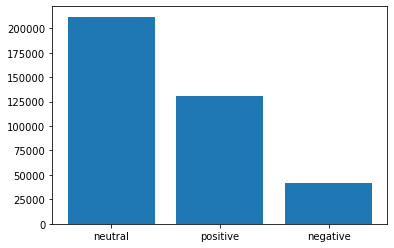

In [53]:
x=['neutral','positive','negative']
y=[neu_s,p_s,n_s]
plt.bar(x,y)

In [54]:
x=[]
y1=[]
y2=[]
y3=[]
for i in range(len(sub['Date'])):
    j=datetime.strftime(sub['Date'].iloc[i],'%Y-%m-%d')
    if j.startswith('2017-10') or j.startswith('2017-11') or j.startswith('2017-12') or j.startswith('2018') or j.startswith('2019') or j.startswith('2020'):
        x.append(sub['Date'][i])
        y2.append(sub['positive'][i])
        y1.append(sub['neutral'][i])
        y3.append(sub['negative'][i])

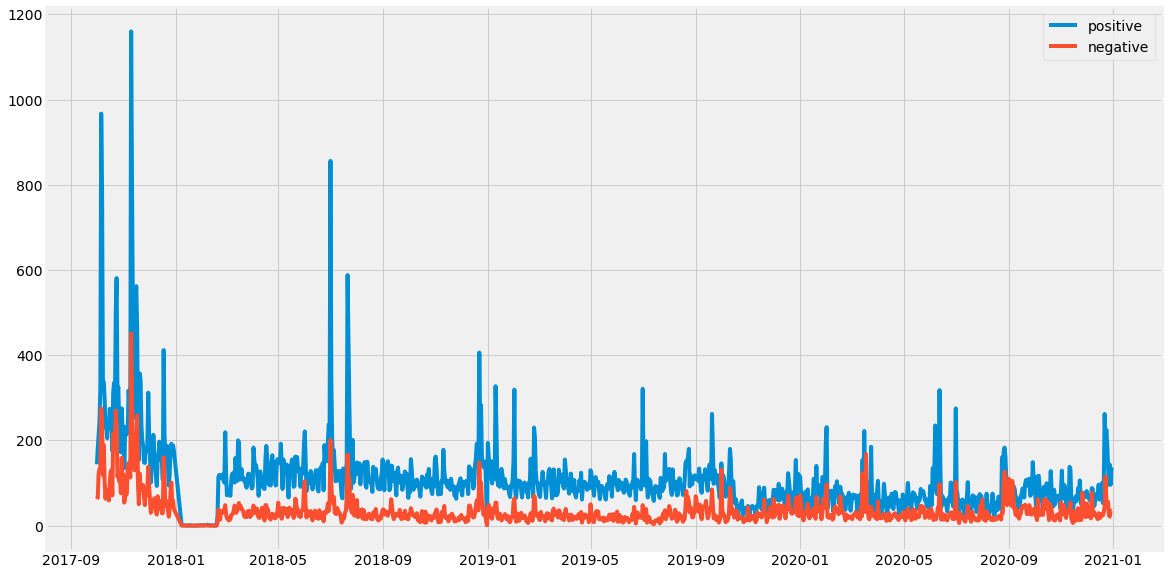

In [55]:
figure(figsize=(20,10))
plt.style.use("fivethirtyeight")
plt.plot(x,y2,label='positive')
plt.plot(x,y3,label= 'negative') 
plt.legend()
plt.show()

In [56]:
#top positive words
pos_tweets = " ".join(sentiment for sentiment in new[new['score']==1]['cleaned text'])
pos_tweets=pos_tweets.split()
w={}
for j in pos_tweets:
    if len(j)>3:
        if(j not in w.keys()):
            w[j]=1
        else:
            w[j]+=1  
top_pos_words=pd.DataFrame({'words':w.keys(),'number':w.values()})
top_pos_words.sort_values(by=['number'],ascending=False).head(10)

,words,number
19,good,16499
122,with,15011
20,service,11805
49,will,11614
25,other,10599
306,this,9303
65,return,7497
241,indi,7408
237,your,7254
37,like,6931


In [57]:
#top negative words
neg_tweets = " ".join(sentiment for sentiment in new[new['score']==-1]['cleaned text'])
neg_tweets=neg_tweets.split()
w={}
for j in neg_tweets:
    if len(j)>3:
        if(j not in w.keys()):
            w[j]=1
        else:
            w[j]+=1  
top_neg_words=pd.DataFrame({'words':w.keys(),'number':w.values()})
top_neg_words.sort_values(by=['number'],ascending=False).head(10)

,words,number
87,with,5571
61,this,5085
146,will,5054
27,govt,3423
390,indi,2828
37,business,2727
303,they,2649
29,fter,2136
52,deonetistion,2114
95,econoy,2083


In [58]:
#words common in both positive and negative tweets
common=top_pos_words.merge(top_neg_words,on=['words'])
common

,words,number_x,number_y
0,derivtives,474,4
1,structurl,170,40
2,ornge,67,1
3,juice,73,8
4,frozen,389,6
...,...,...,...
25340,suorterthe,1,1
25341,he’ll,1,2
25342,lwno,1,1
25343,luetting,1,1


In [59]:
#words in positive tweets but not in negative tweets
top_pos=top_pos_words
for i in top_pos['words']:
    if i in top_neg_words['words']:
        top_pos.drop(top_pos[top_pos['words']==i].index,inplace=True)
top_pos.head(10)    

,words,number
0,sototroin,6
1,derivtives,474
2,structurl,170
3,nlogues,16
4,ornge,67
5,juice,73
6,frozen,389
7,clendrs,12
8,kind,869
9,rinted,179


In [60]:
#words in negative tweets but not in positive tweets
top_neg=top_neg_words
for i in top_neg['words']:
    if i in top_pos_words:
        top_neg.drop(top_neg[top_neg['words']==i].index,inplace=True)
top_neg.head(10)    

,words,number
0,“the,28
1,bullshit,41
2,over”,2
3,yer’s,9
4,essge,63
5,turnbull,31
6,shorten,2
7,west,90
8,fixed,70
9,cbfc,1


### Conclusion

#### It was found that neutral tweets are more in number. But compared to positive and negative tweets, positive tweets were always more in number. But still, we can see that the difference between number of positive and negative tweets is gradually decreasing over time. Or rather, number of positive tweets is reducing over time.

#### Top mentions include @narendramodi,@FinMinIndia,@nsitaraman etc.
#### Top hashtags include #GST, #tax, #demonetisation etc.